## Partículas a una malla
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from scipy.fftpack import fft, ifft
plt.style.use('classic')
%matplotlib inline

In [2]:
global vtx, vty, c1, c2
vtx = []
vty = []
c1 = []
c2 = []
def anillos(R,r,n,i):
    tcx=np.zeros(n)
    tcy=np.zeros(n)
    tcz=np.zeros(n)
    np.random.seed(i)
    centro1=(random()-0.5)*1000.0
    centro2=(random()-0.5)*1000.0
    for i in range(n):
        alpha=np.random.uniform(0, 2.*np.pi)
        beta=np.random.uniform(0, 2.*np.pi)
        x2=(R+r*math.cos(alpha))*math.cos(beta)-centro1
        y2=(R+r*math.cos(alpha))*math.sin(beta)-centro2
        z2=r*math.sin(alpha)
        tcx[i]=x2
        tcy[i]=y2
        vtx.append(tcx[i])
        vty.append(tcy[i])
        c1.append(centro1)
        c2.append(centro2)
        tcz[i]=z2
    plt.plot(tcx,tcy, 'b.')
    circle = plt.Circle((-centro1, -centro2), (R-r)-10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)
    circle = plt.Circle((-centro1, -centro2), (R+r)+10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)

### Generamos varias distribuciones de puntos, una aleatoria 

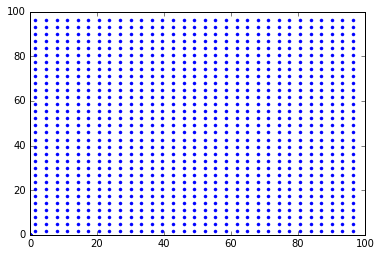

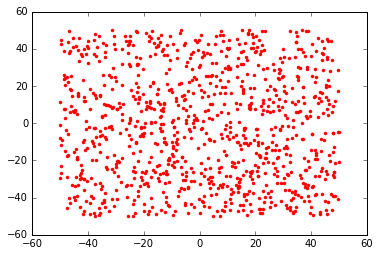

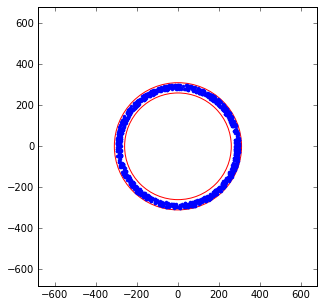

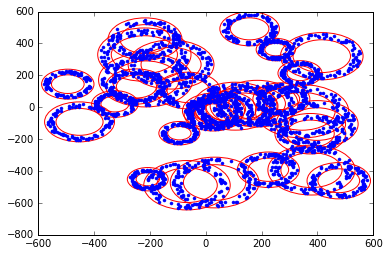

In [3]:
n=1000
rho=0.1
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
k=0
for i in range(int(dim/d)):
    for j in range(int(dim/d)):   
        x[k]=(d/2)+d*i
        y[k]=(d/2)+d*j
        k=k+1
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(x,y, 'b.')
plt.axis([0.0, dim, 0.0, dim]) 
plt.show()
plt.plot(radx,rady, 'r.')
plt.show()

R=290.0
r=10.0
tx=np.zeros(n)
ty=np.zeros(n)
tz=np.zeros(n)
for i in range(n):
    alpha=np.random.uniform(0, 2.*np.pi)
    beta=np.random.uniform(0, 2.*np.pi)
    x2=(R+r*math.cos(alpha))*math.cos(beta)
    y2=(R+r*math.cos(alpha))*math.sin(beta)
    z2=r*math.sin(alpha)
    tx[i]=x2
    ty[i]=y2
    tz[i]=z2
plt.figure(figsize=(5,5))
plt.plot(tx,ty, 'b.')
circle = plt.Circle((0, 0), 260, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
circle = plt.Circle((0, 0), 310, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
plt.axis([-(2*R+100), (2*R+100), -(2*R+100), (2*R+100)]) 
plt.show()

for i in range(30):
    np.random.seed(i)
    z=(1-(random()-0.5))*100
    c=z/10.0
    anillos(z,c,100,i)
plt.figure(figsize=(15,15))
plt.show()

## De un anillo a una malla

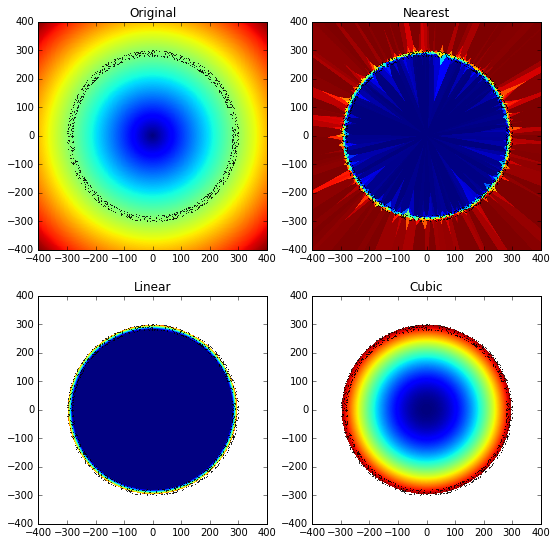

In [4]:
from scipy.interpolate import griddata

def func(x, y):
    return (x**2 + y**2)/np.sqrt(x**2 + y**2)

grid_x, grid_y = np.mgrid[-400:400:1000j, -400:400:1000j]
values = func(tx, ty)
points = (tx, ty)

grid_z1 = griddata(points,values,(grid_x, grid_y),method='linear')
grid_z2 = griddata(points,values,(grid_x, grid_y),method='nearest')
grid_z3 = griddata(points,values,(grid_x, grid_y),method='cubic')

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z2, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z3, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Cubic')
plt.gcf().set_size_inches(9, 9)
plt.show()

## Varios anillos a una malla

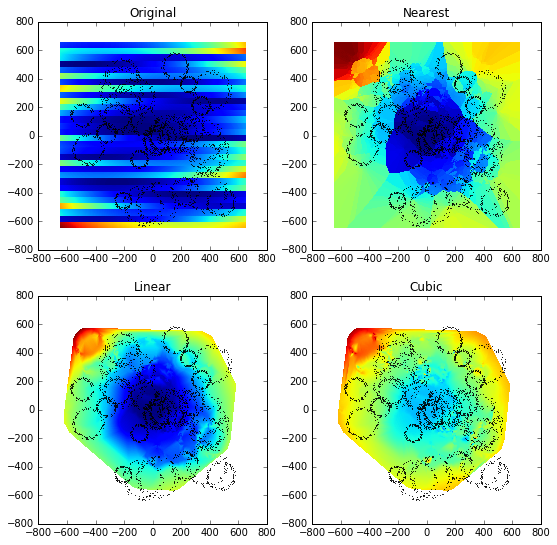

In [5]:
tcx = np.array(vtx)
tcy = np.array(vty)
c1 = np.array(c1)
c2 = np.array(c2)

def func(x, y):
    return ((x-c1)**2 + (y-c2)**2)

grid_x, grid_y = np.mgrid[-650:650:3000j, -650:650:3000j]
values = func(tcx, tcy)
points = (tcx, tcy)

gd_z1 = griddata(points,values,(grid_x, grid_y),method='linear')
gd_z2 = griddata(points,values,(grid_x, grid_y),method='nearest')
gd_z3 = griddata(points,values,(grid_x, grid_y),method='cubic')

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(-650,650,-650,650), origin='lower')
plt.plot(tcx, tcy, 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(gd_z2, extent=(-650,650,-650,650), origin='lower')
plt.plot(tcx, tcy, 'k.', ms=1)
plt.title('Nearest')
plt.subplot(223)
plt.imshow(gd_z1, extent=(-650,650,-650,650), origin='lower')
plt.plot(tcx, tcy, 'k.', ms=1)
plt.title('Linear')
plt.subplot(224)
plt.imshow(gd_z3, extent=(-650,650,-650,650), origin='lower')
plt.plot(tcx, tcy, 'k.', ms=1)
plt.title('Cubic')
plt.gcf().set_size_inches(9, 9)
plt.show()

### Estimador de Landy-Szalay 

$\zeta (r)=1+\left ( \frac{N_{rd}}{N} \right )^{2}\frac{DD(r)}{RR(r)}-2\frac{N_{rd}}{N}\frac{DR(r)}{RR(r)}$

In [6]:
def LSzalay(x,y,xrand,yrand,dim,t_bins,w):
    global xf, err
    nrd = np.size(xrand)
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    vdist = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errls = np.zeros(t_bins)
    for i in range(n):
        v_dist = math.sqrt(x[i]**2 + y[i]**2)
        vdist.append(v_dist)
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+w[i]
            if(r_rand<dmax):
                if(r_rand<t_bins):
                    grand[int(r_rand)]=grand[int(r_rand)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+w[i]
    for i in range(t_bins):
        if(grand[i]!=0):
            errls[i]=abs(1+(((nrd/n)**2.)*(gr[i]/grand[i]))-2*(nrd/n)*(grd[i]/grand[i]))
    xfls=np.linspace(0,460,np.size(errls))
    plt.plot(xfls,errls/np.max(errls),'o-', label='Landy-Szalay')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### Función de correlación del anillo en la malla

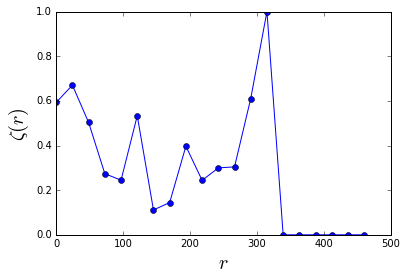

In [7]:
def func(x, y):
    return (x**2 + y**2)/np.sqrt(x**2 + y**2)

w_1 = func(tx, ty)
LSzalay(tx,ty,radx,rady,dim,20,w_1)

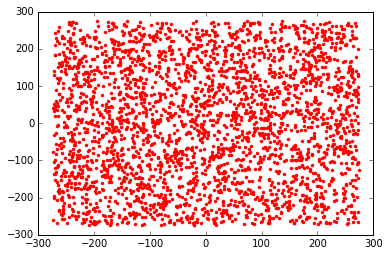

In [8]:
n=np.size(tcx)
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
radx=[]
rady=[]
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(radx,rady, 'r.')
plt.show()

### Función de correlación para los anillos en la malla

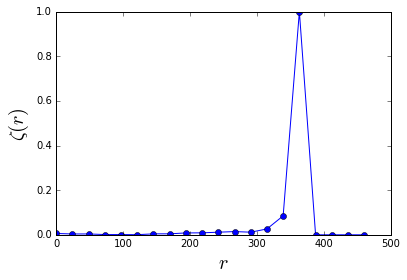

In [9]:
def func(x, y):
    return ((x-c1)**2 + (y-c2)**2)

w_2 = func(tcx, tcy)
LSzalay(tcx,tcy,radx,rady,dim,20,w_2)

In [10]:
def normalize(X):
    NORM = []
    for i in X:
        norm= (i-min(X))/(max(X)-min(X))
        NORM.append(norm)
    return NORM

### Se calcula la función de correlación a través del espectro de potencias

In [11]:
def pwd(x,y,t_bins):
    n=np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    A = dim **2
    rd = []
    r_dx = []
    r_dy = []
    p = []
    k = []
    for i in range(n):
        for j in range(i+1,n-1):
            rx = math.sqrt((x[i]-x[j])**2.)
            ry = math.sqrt((y[i]-y[j])**2.)
            r = math.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            if(r>0.1):
                rd.append(r)
                r_dx.append(rx)
                r_dy.append(ry)
                k_dr = np.sqrt((1.0/r)**2.0)
                k.append(k_dr)
    j=complex(0,1) # Se define el vector complejo, (0,1)
    k = k[0:t_bins]
    rd = rd[0:t_bins]
    for i in range(t_bins):
        ps = np.exp(-j*k[i]*np.array(rd))
        p.append((A/n)*((abs(np.sum(ps)))**2.)-(A/n))
    p = normalize(p)
    plt.plot(k,p,'o')
    plt.xlabel("$k$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$P$ $(k)$",fontsize = 20)   # Establece el título del eje y
    plt.show()
    gf = fft(p)
    gf = gf[1:(np.size(gf)+1)/2]
    m = np.size(gf)
    xf = np.linspace((1.0/np.max(k)),(1.0/np.min(k)),m)
    plt.plot(xf,abs(gf), 'ro-')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y
    plt.autoscale
    plt.show()

### Para el anillo

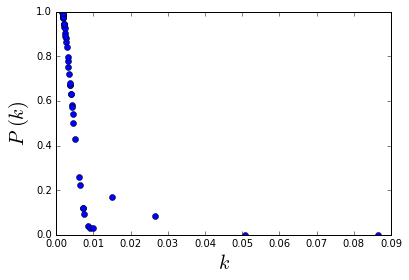

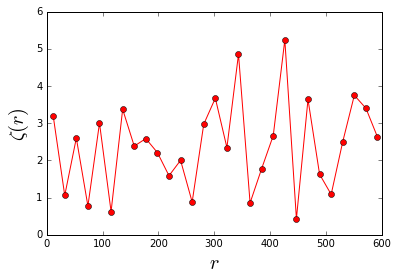

In [12]:
pwd(tx,ty,60)

### Para los anillos

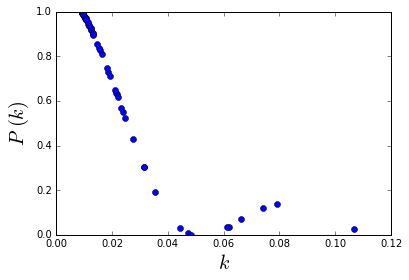

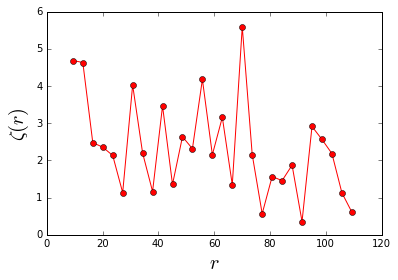

In [13]:
pwd(tcx,tcy,60)

### Campo discreto para el anillo

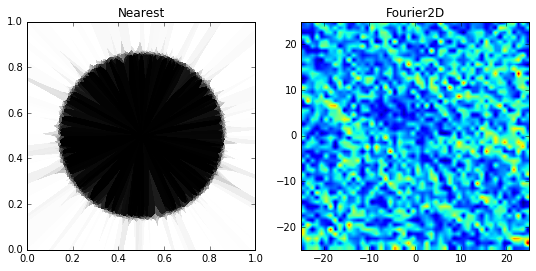

In [14]:
from numpy.fft import fft2, fftshift, ifft2 

hW, hH = 300, 300    

H,W = np.shape(grid_z2)

plt.subplot(221)
plt.imshow(grid_z2, cmap = 'gray', extent=[0.0,1.0,0.0,1.0])
plt.title('Nearest')

plt.subplot(222)
F = fft2(grid_z2)                             
F = fftshift(F)
P = np.abs(F)
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25])
plt.title('Fourier2D')

plt.gcf().set_size_inches(9, 9)

### Campo discreto para los anillos

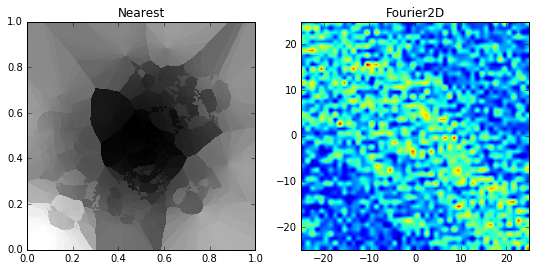

In [15]:
hW, hH = 300, 300    

H,W = np.shape(gd_z2)

plt.subplot(221)
plt.imshow(gd_z2, cmap = 'gray', extent=[0.0,1.0,0.0,1.0])
plt.title('Nearest')

plt.subplot(222)
F = fft2(gd_z2)                             
F = fftshift(F)
P = np.abs(F)
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25])
plt.title('Fourier2D')

plt.gcf().set_size_inches(9, 9)